# Intermediate Linear Algebra  - Eigenvalues & Eigenvectors

### Key Equation: $Ax = \lambda b ~~ \text{for} ~~ n \times n $

## Transformations

So what really happens when we multiply the $A$ matrix with a vector $x$

Lets say we have a vector - $x$

$$ x = \begin{bmatrix} -1 \\ 1 \end{bmatrix} $$

What happens when we multiply by a matrix - $A$

$$ A = \begin{bmatrix} 6 & 2 \\ 2 & 6 \end{bmatrix} $$

$$ Ax = \begin{bmatrix} 6 & 2 \\ 2 & 6 \end{bmatrix} \begin{bmatrix} -1 \\ 1 \end{bmatrix} = \begin{bmatrix} -4  \\ 4 \end{bmatrix} $$

$$ Ax = 4Ix $$

$$ Ax = 4x $$

So this particular matrix has just scaled our original vector. It is a scalar transformation. Other matrices can do reflection, rotation and any arbitary transformation in the same 2d space for n = 2.

Lets see what has happened through code.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [9]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [3]:
def vector_plot (vector):
    X,Y,U,V = zip(*vector)
    C = [1,1,2,2]
    plt.figure()
    ax = plt.gca()
    ax.quiver(X,Y,U,V,C, angles='xy',scale_units='xy',scale=1)
    ax.set_xlim([-6,6])
    ax.set_ylim([-6,6])
    plt.axhline(0, color='grey', linewidth=1)
    plt.axvline(0, color='grey', linewidth=1)
    plt.axes().set_aspect('equal')
    plt.draw()

In [4]:
A = np.array([[ 6 , 2],
               [ 2 , 6]])

In [5]:
x = np.array([[-1],
             [1]])

In [6]:
v = A.dot(x)

In [7]:
# All the vectors start at 0, 0 
vAX = np.r_[[0,0],A[:,0]]
vAY = np.r_[[0,0],A[:,1]]
vx = np.r_[[0,0],x[:,0]]
vv = np.r_[[0,0],v[:,0]]

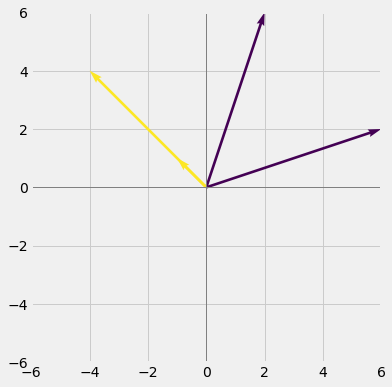

In [10]:
vector_plot([vAX, vAY, vx, vv])

##  Solving Equation $Ax=\lambda x$



### Special Case: $Ax = 0$ 

So far we have been solving the equation $Ax = b$. Let us just look at special case when $b=0$.

$$ Ax =0 $$

If $A^{-1}$ exists (the matrix is non-singular and invertable), then the solution is trival

$$ A^{-1}Ax =0 $$
$$ x = 0$$

If $A^{-1}$ does not exist, then there may be infinitely many other solutions $x$. And since $A^{-1}$ is a singular matrix then

$$||A|| = 0 $$

### General Case


The second part of linear algebra is solving the equation, for a given $A$ - 

$$ Ax = \lambda x$$

Note that both $x$ and $\lambda$ are unknown in this equation. For all solutions of them:

$$ \text{eigenvalues} = \lambda $$
$$ \text{eigenvectors} = x $$


## Calculating Eigenvalues

So let us first solve this for $\lambda$ :

$$ Ax = \lambda Ix $$

$$ (A-\lambda I)x = 0 $$

So for non-trivial solution of $x$, $A$ should be singular:

$$ ||A - \lambda I|| = 0 $$

## For 2 x 2 Matrix

Let us use the sample $A$ vector:

$$ A =  \begin{bmatrix}3 & 1\\ 1 & 3\end{bmatrix} $$

So our equation becomes: 

$$ \begin{bmatrix}3 & 1\\ 1 & 3\end{bmatrix} \begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}\lambda & 0\\ 0 & \lambda \end{bmatrix} \begin{bmatrix}x \\ y\end{bmatrix} $$

$$ \begin{bmatrix}3 - \lambda & 1\\ 1 & 3 - \lambda \end{bmatrix} \begin{bmatrix}x \\ y\end{bmatrix} = 0 $$

So for a singular matrix: 

$$ \begin{Vmatrix}3 - \lambda & 1\\ 1 & 3 - \lambda \end{Vmatrix} = 0 $$


$$ (3 - \lambda)^2 - 1  = 0 $$

$$ \lambda^2 - 6\lambda + 8 = 0 $$

$$ (\lambda - 4)(\lambda - 2) = 0 $$

$$ \lambda_1 = 2, \lambda_2 = 4 $$

$$||A|| = \lambda_{1} \lambda_{2} $$


## Calculating Eigenvectors

For $\lambda = 2$,

$$ \begin{bmatrix}3 - \lambda & 1\\ 1 & 3 - \lambda \end{bmatrix} \begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}1 & 1\\ 1 & 1 \end{bmatrix} \begin{bmatrix}x \\ y\end{bmatrix} = 0 $$

So one simple solution is:

$$ \begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}-1 \\ 1\end{bmatrix} $$

For $\lambda = 4$,

$$ \begin{bmatrix}3 - \lambda & 1\\ 1 & 3 - \lambda \end{bmatrix} \begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}-1 & 1\\ 1 & -1 \end{bmatrix} \begin{bmatrix}x \\ y\end{bmatrix} = 0 $$

So one simple solution is:

$$ \begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}1 \\ 1\end{bmatrix} $$


The eigenvectors are orthonormal to each other in this case.


## Vector Representation (2x2)

A vector representation for this is now:

$$ \begin{bmatrix}3 \\ 1\end{bmatrix} x + \begin{bmatrix}1 \\ 3\end{bmatrix} y = \begin{bmatrix} \lambda \\  0 \end{bmatrix} x + \begin{bmatrix} 0 \\ \lambda \end{bmatrix} y $$

Now we need to draw these vectors and see the result

In [11]:
A = np.array([[ 3 , 1],
               [ 1 , 3]])

In [12]:
eigen_val, eigen_vec = np.linalg.eig(A)

In [13]:
eigen_val

array([4., 2.])

In [14]:
eigen_vec

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [15]:
eigen_vec[:,0]

array([0.70710678, 0.70710678])

In [16]:
# All the vectors start at 0, 0 
vX1 = np.r_[[0,0],A[:,0]]
vY1 = np.r_[[0,0],A[:,1]]
vE1 = np.r_[[0,0],eigen_vec[:,0]] * 2
vE2 = np.r_[[0,0],eigen_vec[:,1]] * 2

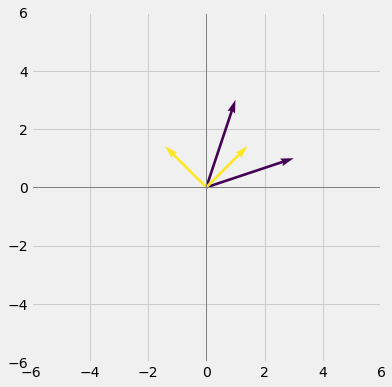

In [17]:
vector_plot([vX1, vY1, vE1, vE2])

# 3 x 3 Matrix


Let us write it in the form 

$$ Ax = \lambda x $$

$$ \begin{bmatrix}1 & 1 & 1 \\ 3 & 8 & 1 \\ 5 & -4 & 3\end{bmatrix}\begin{bmatrix} x \\y \\ z\end{bmatrix}= \lambda \begin{bmatrix} x\\ y \\ x \end{bmatrix} $$


In [18]:
f = np.matrix([[1,1,1],
               [3,8,1],
               [5,-4,3]])

In [19]:
np.linalg.eig(f)

(array([-0.70156212,  5.70156212,  7.        ]),
 matrix([[-5.44055877e-01,  8.18568585e-02, -6.92369738e-17],
         [ 9.17246072e-02, -4.85526254e-01, -7.07106781e-01],
         [ 8.34020263e-01,  8.70381360e-01,  7.07106781e-01]]))

## Exercises on Eigenvalues and Eigenvectors

$$ U =  \begin{bmatrix}1 & 1 & 0 \\ 0 & 2 & 0 \\ 0 & -1 & 4\end{bmatrix}$$

$$ S =  \begin{bmatrix}3 & 1 & 2 \\ 1 & 4 & 5 \\ 2 & 5 & 6 \end{bmatrix}$$

$$ T =  \begin{bmatrix}5 & 8 \\ 0 & 5 \end{bmatrix}$$


Write the matrix as np.matrix and find the Eigenvalues and Eigenvectors?

In [21]:
U = np.matrix([[1,1,0],
               [0,2,0],
               [0,-1,4]])

In [22]:
eigen_val, eigen_vec = np.linalg.eig(U)

In [23]:
eigen_val

array([1., 4., 2.])

In [24]:
eigen_vec

matrix([[1.        , 0.        , 0.66666667],
        [0.        , 0.        , 0.66666667],
        [0.        , 1.        , 0.33333333]])

In [25]:
S = np.matrix([[3,1,2],
               [1,4,5],
               [2,5,6]])

In [26]:
eigen_val, eigen_vec = np.linalg.eig(S)

In [27]:
eigen_val

array([10.71704321,  2.47171128, -0.18875449])

In [28]:
eigen_vec

matrix([[ 0.27264929,  0.94543361, -0.17837501],
        [ 0.60027549, -0.31204863, -0.73640681],
        [ 0.75188543, -0.09370664,  0.65260047]])

In [32]:
T = np.matrix([[5,8],
               [0,5]])

In [33]:
eigen_val, eigen_vec = np.linalg.eig(T)

In [34]:
eigen_val

array([5., 5.])

In [35]:
eigen_vec

matrix([[ 1.00000000e+00, -1.00000000e+00],
        [ 0.00000000e+00,  1.38777878e-16]])

## Symmetric Matrix and Eigen Vectors

$$ V =  \begin{bmatrix}1 & 2 & -1 \\ 2 & -1 & -2 \\ -1 & -2 & 1\end{bmatrix}$$
